In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

In [ ]:
# Import necessary modules first.
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_SIZE = 300
BATCH_SIZE = 32
EPOCH=90
CHANNELS=3

In [ ]:
import os
os.chdir('/content/drive/MyDrive')

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("diseasedetection",
                                                    shuffle=True,
                                                    image_size =(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE
)


Found 2999 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['downsyndrome', 'healthy', '{model_version}']

In [ ]:
 len(dataset)

94

In [ ]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

KeyboardInterrupt: 

In [ ]:
80% ==> training
20% ==> 10% validation,10% test

SyntaxError: invalid syntax (<ipython-input-11-69d2d1c3dce9>, line 1)

In [ ]:
train_size = 0.8
len(dataset)*train_size

75.2

In [ ]:
train_ds = dataset.take(75)
len(train_ds)

75

In [ ]:
test_ds = dataset.skip(75)
len(test_ds)

19

In [ ]:
val_size=0.1
len(dataset)*val_size

9.4

In [ ]:
val_ds=test_ds.take(9)
len(val_ds)

9

In [ ]:
test_ds=test_ds.skip(9)
len(test_ds)

10

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
                              ds_size = len(ds)
                              if shuffle:
                                  ds = ds.shuffle(shuffle_size, seed=12)
                              train_size=int(train_split * ds_size)
                              val_size=int(val_split * ds_size)
                              train_ds = ds.take(train_size)
                              val_ds=ds.skip(train_size).take(val_size)
                              test_ds=ds.skip(train_size).skip(val_size)
                              return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

75

In [ ]:
len(val_ds)

9

In [ ]:
len(test_ds)

10

In [ ]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
 data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

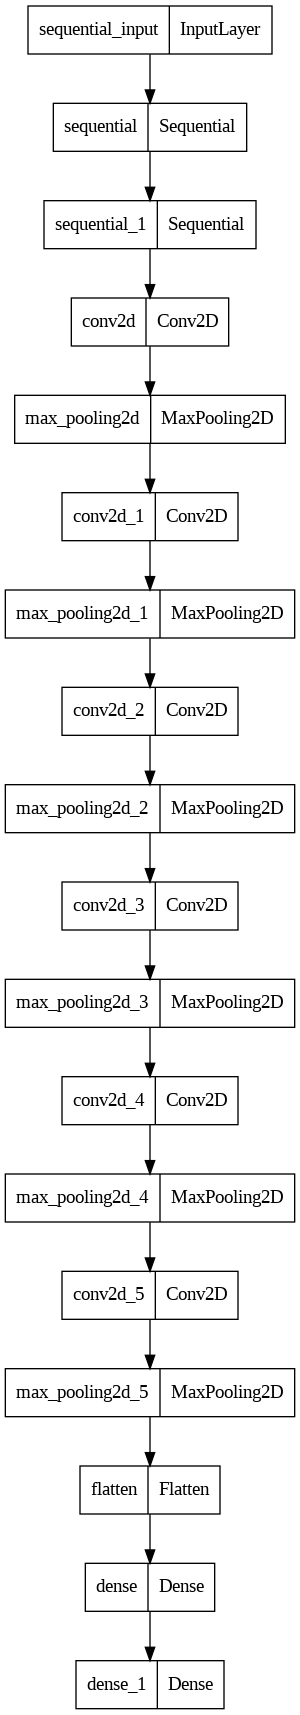

In [ ]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
model.compile(
    optimizer='adam' ,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=90,
)

Epoch 1/90
75/75 [==============================] - 266s 243ms/step - loss: 0.6909 - accuracy: 0.5286 - val_loss: 0.6736 - val_accuracy: 0.5833
Epoch 2/90
75/75 [==============================] - 15s 80ms/step - loss: 0.6817 - accuracy: 0.5633 - val_loss: 0.6446 - val_accuracy: 0.6493
Epoch 3/90
75/75 [==============================] - 15s 81ms/step - loss: 0.6398 - accuracy: 0.6399 - val_loss: 0.6270 - val_accuracy: 0.6424
Epoch 4/90
75/75 [==============================] - 15s 81ms/step - loss: 0.6419 - accuracy: 0.6407 - val_loss: 0.6100 - val_accuracy: 0.6389
Epoch 5/90
75/75 [==============================] - 15s 81ms/step - loss: 0.6908 - accuracy: 0.5471 - val_loss: 0.6806 - val_accuracy: 0.5660
Epoch 6/90
75/75 [==============================] - 15s 79ms/step - loss: 0.6528 - accuracy: 0.6274 - val_loss: 0.6639 - val_accuracy: 0.6076
Epoch 7/90
75/75 [==============================] - 15s 82ms/step - loss: 0.6254 - accuracy: 0.6520 - val_loss: 0.6037 - val_accuracy: 0.6667
Epoc

In [ ]:
scores = model.evaluate(test_ds)

10/10 [==============================] - 11s 39ms/step - loss: 0.3141 - accuracy: 0.8625


In [ ]:
scores

[0.31412655115127563, 0.862500011920929]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 90, 'steps': 75}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
EPOCHS=90

Text(0.5, 1.0, 'Training and Validation Accuracy')

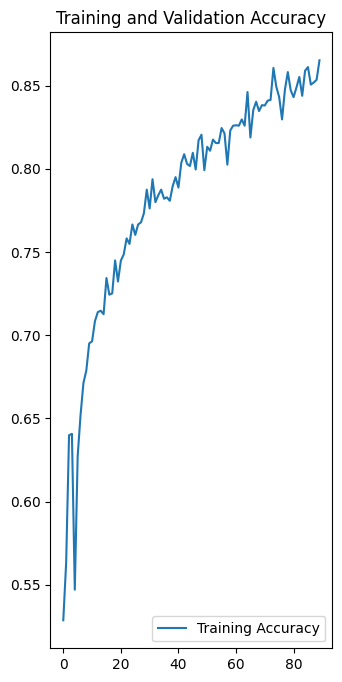

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

first image to predict
actual label: downsyndrome
1/1 [==============================] - 0s 156ms/step
predicted label: downsyndrome


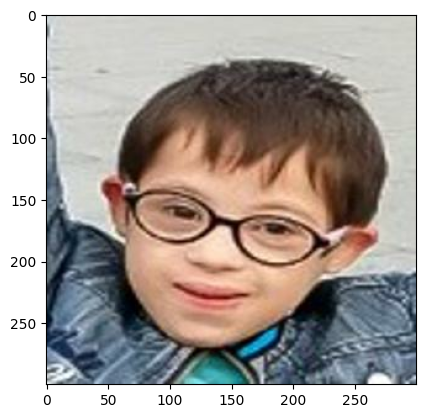

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 26ms/step


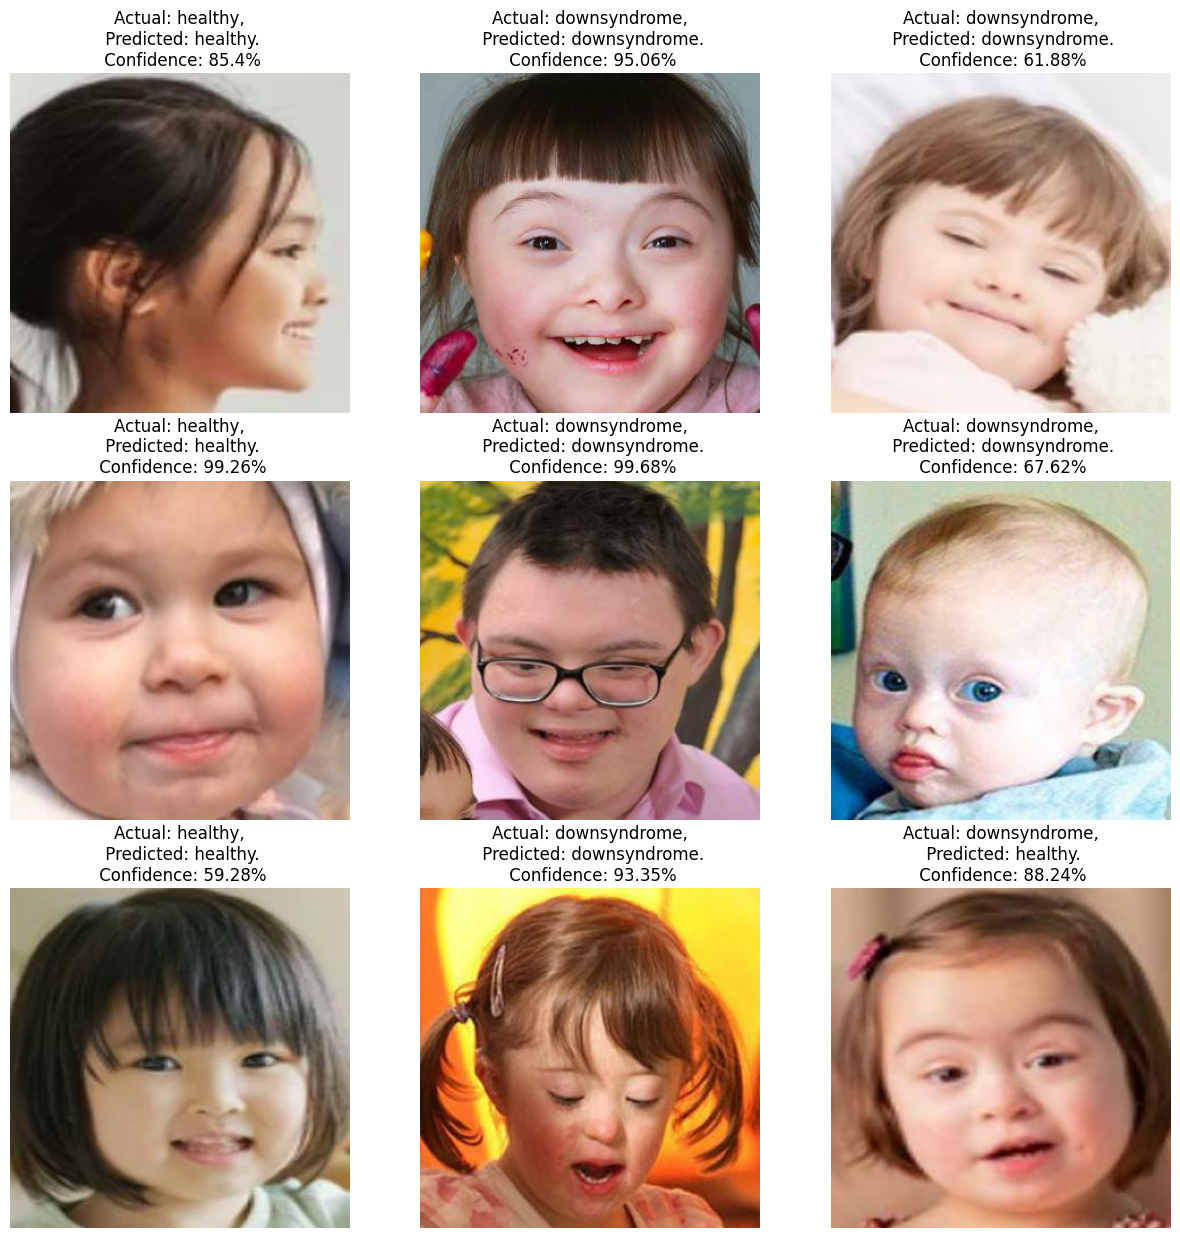

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
import os
model_version=max([int(i) for i in os.listdir("D:\\diseasedetection") + [0]])+1
model.save(f"../models/{model_version}")

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\diseasedetection\\models'